# Modelling Major Influential Factors of Medicare Social Media Performance
_Author: Natalie Kampf_

---

## Setting up the Data 

In [9]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [10]:
#load in birthday data set 
birthday_compiled = pd.read_csv('Birthday_compiled.csv')

In [13]:
# taking a look at birthday data set
birthday_compiled.head()

,Tagging ID,Day,Ai_trk,GP Job Name,Impressions,Media Cost,visits,Call Leads,Web Leads
0,4348319SOC-BDA1-C1,18-Jan-19,19SOC-BDA1-C1,Age-In NTM Social Facebook (64+6 mo) Free Guide,333,$5.85,3.0,NaN,NaN
1,4348319SOC-BDA1-C2,18-Jan-19,19SOC-BDA1-C2,Age-In NTM Social Facebook (64+6 mo) Three Mon...,340,$6.87,3.0,0.0,NaN
2,4348319SOC-BDA1-C3,18-Jan-19,19SOC-BDA1-C3,Age-In NTM Social Facebook (64+6 mo) Carousel,156,$2.15,2.0,NaN,NaN
3,4348319SOC-BDA2-C3,18-Jan-19,19SOC-BDA2-C3,Age-In NTM Social Facebook (64+9 mo) Image Car...,303,$6.00,NaN,NaN,NaN
4,4348319SOC-BDA3-C1,18-Jan-19,19SOC-BDA3-C1,Age-In NTM Social Facebook (64+11mo) See Any D...,177,$1.56,NaN,NaN,NaN


In [14]:
birthday_compiled.shape

(2288, 9)

In [15]:
birthday_compiled.isnull().sum()

Tagging ID        1
Day               1
Ai_trk            1
GP Job Name       1
Impressions       1
Media Cost        0
visits          676
Call Leads     2016
Web Leads      2017
dtype: int64

In [16]:
birthday_compiled.sum()

visits        4984.0
Call Leads      49.0
Web Leads      461.0
dtype: float64

In [17]:
print(birthday_compiled.loc[:,'Web Leads'].sum())
print(birthday_compiled.loc[:,'Call Leads'].sum())

461.0
49.0


In [18]:
birthday_compiled['Total Leads'] = birthday_compiled['Call Leads'] + birthday_compiled['Web Leads']
#taking a look with new total leads column 
birthday_compiled.head()

,Tagging ID,Day,Ai_trk,GP Job Name,Impressions,Media Cost,visits,Call Leads,Web Leads,Total Leads
0,4348319SOC-BDA1-C1,18-Jan-19,19SOC-BDA1-C1,Age-In NTM Social Facebook (64+6 mo) Free Guide,333,$5.85,3.0,NaN,NaN,NaN
1,4348319SOC-BDA1-C2,18-Jan-19,19SOC-BDA1-C2,Age-In NTM Social Facebook (64+6 mo) Three Mon...,340,$6.87,3.0,0.0,NaN,NaN
2,4348319SOC-BDA1-C3,18-Jan-19,19SOC-BDA1-C3,Age-In NTM Social Facebook (64+6 mo) Carousel,156,$2.15,2.0,NaN,NaN,NaN
3,4348319SOC-BDA2-C3,18-Jan-19,19SOC-BDA2-C3,Age-In NTM Social Facebook (64+9 mo) Image Car...,303,$6.00,NaN,NaN,NaN,NaN
4,4348319SOC-BDA3-C1,18-Jan-19,19SOC-BDA3-C1,Age-In NTM Social Facebook (64+11mo) See Any D...,177,$1.56,NaN,NaN,NaN,NaN


In [19]:
#re-working the data to not include any objects
bday = birthday_compiled[birthday_compiled.columns[1:]].replace('[\,]', '', regex=True).astype(object)

In [20]:
bday['Media Cost'] = bday['Media Cost'].str.replace('$', '')



#this is me dropping the last row of data because it was giving me issues as it was completely blank of datas 
bday = bday[:-1]
bday = bday.fillna(0)

In [21]:
bday.head()

,Day,Ai_trk,GP Job Name,Impressions,Media Cost,visits,Call Leads,Web Leads,Total Leads
0,18-Jan-19,19SOC-BDA1-C1,Age-In NTM Social Facebook (64+6 mo) Free Guide,333,5.85,3.0,0.0,0.0,0.0
1,18-Jan-19,19SOC-BDA1-C2,Age-In NTM Social Facebook (64+6 mo) Three Mon...,340,6.87,3.0,0.0,0.0,0.0
2,18-Jan-19,19SOC-BDA1-C3,Age-In NTM Social Facebook (64+6 mo) Carousel,156,2.15,2.0,0.0,0.0,0.0
3,18-Jan-19,19SOC-BDA2-C3,Age-In NTM Social Facebook (64+9 mo) Image Car...,303,6.00,0.0,0.0,0.0,0.0
4,18-Jan-19,19SOC-BDA3-C1,Age-In NTM Social Facebook (64+11mo) See Any D...,177,1.56,0.0,0.0,0.0,0.0


Day            18-Jan-1918-Jan-1918-Jan-1918-Jan-1918-Jan-191...
Ai_trk         19SOC-BDA1-C119SOC-BDA1-C219SOC-BDA1-C319SOC-B...
GP Job Name    Age-In NTM Social Facebook (64+6 mo) Free Guid...
Impressions    3333401563031773376930429933929025922925216620...
Media Cost     5.85 6.87 2.15 6.00 1.56 9.13 1.32 5.67 10.33 ...
visits                                                      4984
Call Leads                                                    49
Web Leads                                                    461
Total Leads                                                  510
dtype: object

### Setting up the data to not have ID for looking at the log of the data to see if it would be less skewed

In [22]:
bday_noid = bday.drop(columns = 'Ai_trk')

In [23]:
bday_noid.head()

,Day,GP Job Name,Impressions,Media Cost,visits,Call Leads,Web Leads,Total Leads
0,18-Jan-19,Age-In NTM Social Facebook (64+6 mo) Free Guide,333,5.85,3.0,0.0,0.0,0.0
1,18-Jan-19,Age-In NTM Social Facebook (64+6 mo) Three Mon...,340,6.87,3.0,0.0,0.0,0.0
2,18-Jan-19,Age-In NTM Social Facebook (64+6 mo) Carousel,156,2.15,2.0,0.0,0.0,0.0
3,18-Jan-19,Age-In NTM Social Facebook (64+9 mo) Image Car...,303,6.00,0.0,0.0,0.0,0.0
4,18-Jan-19,Age-In NTM Social Facebook (64+11mo) See Any D...,177,1.56,0.0,0.0,0.0,0.0


In [24]:
bday_noid= bday_noid.drop(columns = 'GP Job Name')

In [25]:
bday_noid=bday_noid.drop(columns = 'Day')

In [26]:
bday_noid.head()

,Impressions,Media Cost,visits,Call Leads,Web Leads,Total Leads
0,333,5.85,3.0,0.0,0.0,0.0
1,340,6.87,3.0,0.0,0.0,0.0
2,156,2.15,2.0,0.0,0.0,0.0
3,303,6.00,0.0,0.0,0.0,0.0
4,177,1.56,0.0,0.0,0.0,0.0


In [27]:
bday["Impressions"] = pd.to_numeric(bday["Impressions"])
bday["Media Cost"] = pd.to_numeric(bday["Media Cost"])

In [28]:
bday.describe()

,Impressions,Media Cost,visits,Call Leads,Web Leads,Total Leads
count,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000
mean,389.085265,9.114359,2.179274,0.021425,0.201574,0.223000
std,414.469885,9.668811,2.598749,0.169852,0.762781,0.788775
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,130.500000,3.055000,0.000000,0.000000,0.000000,0.000000
50%,276.000000,6.980000,1.000000,0.000000,0.000000,0.000000
75%,510.500000,11.830000,3.000000,0.000000,0.000000,0.000000
max,5064.000000,119.830000,20.000000,3.000000,10.000000,10.000000


#### Splitting columns into target + feature cols

In [29]:
# Splitting columns into target and features
target_col='Total Leads'
y = bday.loc[:,target_col]

feature_cols =  'visits', 'Media Cost', 'Impressions'
X = bday.loc[:,feature_cols]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)

from sklearn.linear_model import LinearRegression 
lr= LinearRegression()

lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))
print(lr.score(X_train, y_train))

0.0610981226496462
0.1518799404097717


In [30]:

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
print(dtr.score(X_train, y_train))
print(dtr.score(X_test, y_test))

1.0
-0.43748387014888124


### I modified the Model by adding back in Web Leads to the feature columns to take a look at Total Leads

In [31]:
target_col='Total Leads'
y = bday.loc[:,target_col]

feature_cols =  'visits', 'Media Cost', 'Impressions', 'Web Leads'
X1 = bday.loc[:,feature_cols]

from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, shuffle = False)

from sklearn.linear_model import LinearRegression 
lr= LinearRegression()

lr.fit(X1_train, y_train)
print(lr.score(X1_test, y_test))
print(lr.score(X1_train, y_train))

0.9693017280380877
0.9480319113912312


In [32]:

from sklearn.tree import DecisionTreeClassifier

dtr = DecisionTreeRegressor()
dtr.fit(X1_train, y_train)
print(dtr.score(X1_train, y_train))
print(dtr.score(X1_test, y_test))

1.0
0.8620596286220771


In [33]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train, lr.predict(X_train)))
print(mean_squared_error(y_test, lr.predict(X_test)))

#y_pred = lr.predict(X_test)
#np.sqrt(mean_squared_error(y_test, y_pred))

ValueError: shapes (1715,3) and (4,) not aligned: 3 (dim 1) != 4 (dim 0)

In [34]:
# Evaluating the model 
print('Test Data R-Squared:', lr.score(X_test, y_test))       # Comparing test data to null model/finding R-Squared 
print('Training Data R-Squared:', lr.score(X_train, y_train)) # Comparing test data to null model/finding R-Squared 

y_pred = lr.predict(X_test)
print('Test Data RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Finding RMSE
print ('Test Data MAE:', metrics.mean_absolute_error(y_test, y_pred))         # Finding MAE

ValueError: shapes (572,3) and (4,) not aligned: 3 (dim 1) != 4 (dim 0)

In [35]:
# Evaluating the upated Model with web leads added
print('Test Data R-Squared:', lr.score(X1_test, y_test))       # Comparing test data to null model/finding R-Squared 
print('Training Data R-Squared:', lr.score(X1_train, y_train)) # Comparing test data to null model/finding R-Squared 

y_pred = lr.predict(X1_test)
print('Test Data RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Finding RMSE
print ('Test Data MAE:', metrics.mean_absolute_error(y_test, y_pred))         # Finding MAE

Test Data R-Squared: 0.9693017280380877
Training Data R-Squared: 0.9480319113912312
Test Data RMSE: 0.14891919592492772
Test Data MAE: 0.045225578709063324


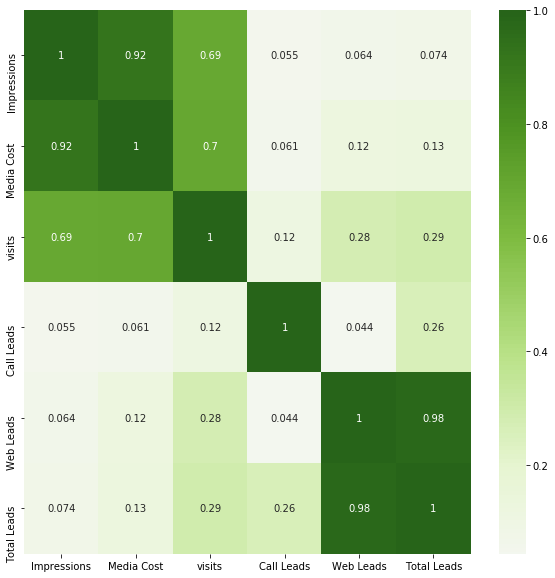

In [36]:
fig, ax4 = plt.subplots(figsize=(10,10))         
sns.heatmap(bday.corr(), center=0, cmap="PiYG", annot = True, ax = ax4);
    

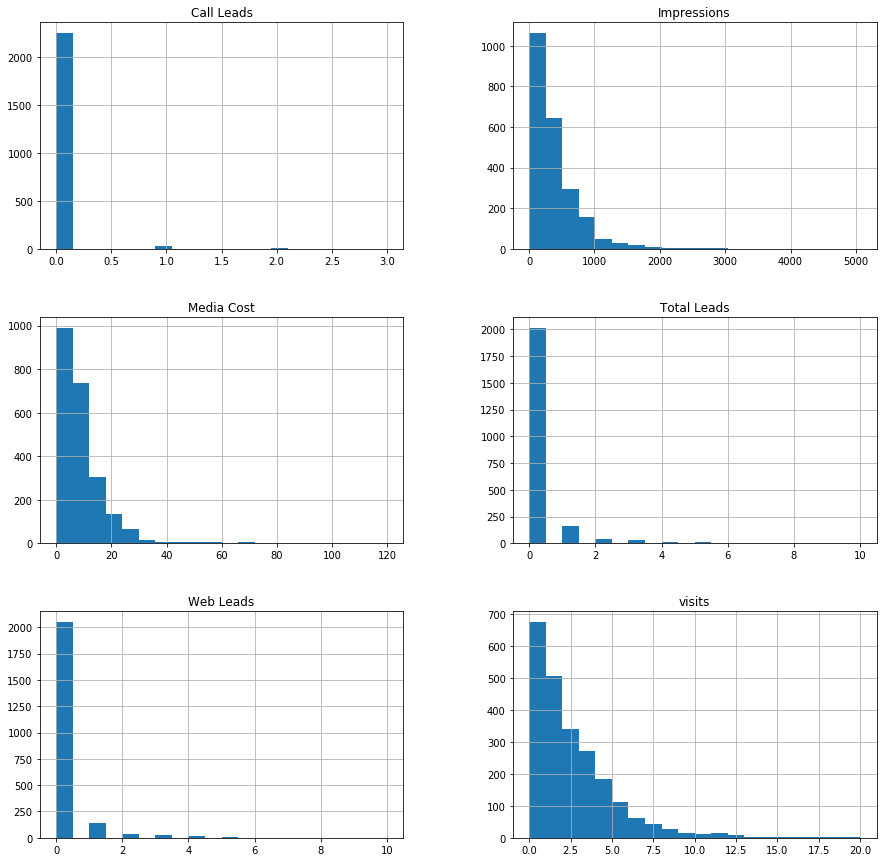

In [38]:
ax3 = bday.hist(figsize=(15,15), bins = 20) 

## Decided to look at a log of the data to see if it is less skewed

In [33]:
bday_noid["Impressions"] = pd.to_numeric(bday_noid["Impressions"])
bday_noid["Media Cost"] = pd.to_numeric(bday_noid["Media Cost"])

In [34]:
bday_log = np.log(bday_noid)

/Users/nataliekampf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [35]:
bday_noid.dtypes

Impressions      int64
Media Cost     float64
visits         float64
Call Leads     float64
Web Leads      float64
Total Leads    float64
dtype: object

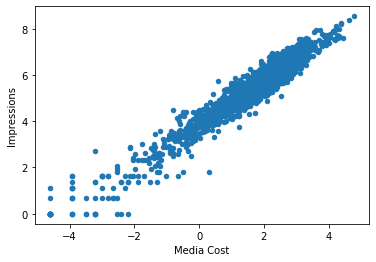

In [36]:
ax = bday_log.plot(kind='scatter', x='Media Cost', y='Impressions');

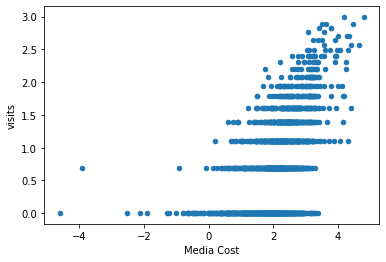

In [81]:
ax = bday_log.plot(kind='scatter', x='Media Cost', y='visits');

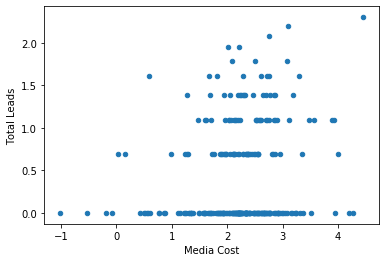

In [84]:
ax = bday_log.plot(kind='scatter', x='Media Cost', y='Total Leads');

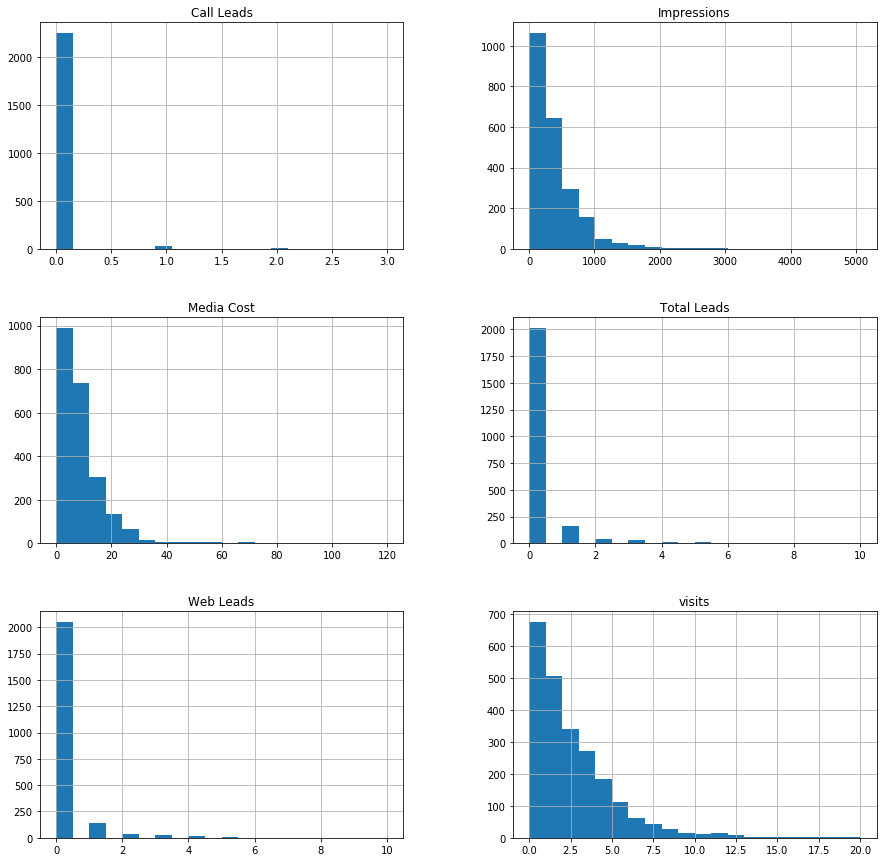

In [37]:
ax3 = bday_noid.hist(figsize=(15,15), bins = 20) 


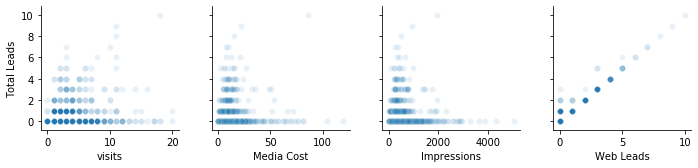

In [48]:

g = sns.pairplot(bday,
                 x_vars=X.columns,
                 y_vars=target_col,
                 plot_kws={'alpha': .1}
                 )

## Plotting each type of feature with the target feature 

Text(0.5, 1.0, 'Total Leads Based on Visits')

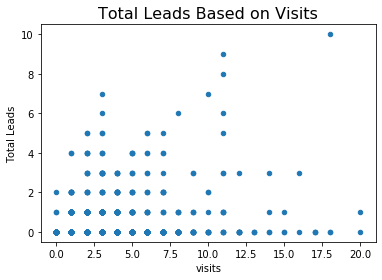

In [74]:
ax1= bday.plot(kind = 'scatter', x='visits', y = 'Total Leads')
ax1.set_title('Total Leads Based on Visits', fontsize=16)

Text(0.5, 1.0, 'Total Leads Based on Impressions')

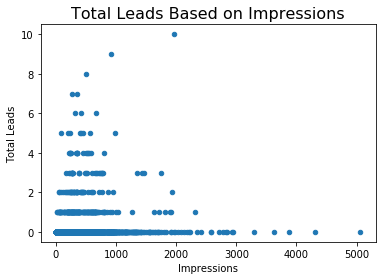

In [76]:
ax2 = bday.plot(kind = 'scatter', x='Impressions', y = 'Total Leads')
ax2.set_title('Total Leads Based on Impressions', fontsize=16)

# Testing & Evaluating Models


In [37]:

#importing sklearn modules
#models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
#model selection
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#scoring
from sklearn import metrics
from scipy import stats


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 23)

In [39]:
baseline_err = abs(y_test.mean() - y_test)
print('Average baseline MAE: ', round(np.mean(baseline_err), 2))
#our baseline error MAE will be about Close to .40/ Lead per day guessed if we use the mean value each time

Average baseline MAE:  0.38


### Looking at decision tree regressor

In [40]:


dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(X, y)
dtr.score(X, y)

!conda install -y graphviz


Solving environment: done

# All requested packages already installed.



In [45]:
images_dir = '../'
dotfile_path = f'{images_dir}/bday_tree.dot'
png_path = f'{images_dir}/bday_tree.png'

In [46]:
from sklearn.tree import export_graphviz

export_graphviz(dtr, out_file=dotfile_path, feature_names=X.columns)

NotFittedError: This DecisionTreeRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [47]:
!dot -Tpng {dotfile_path} -o {png_path}

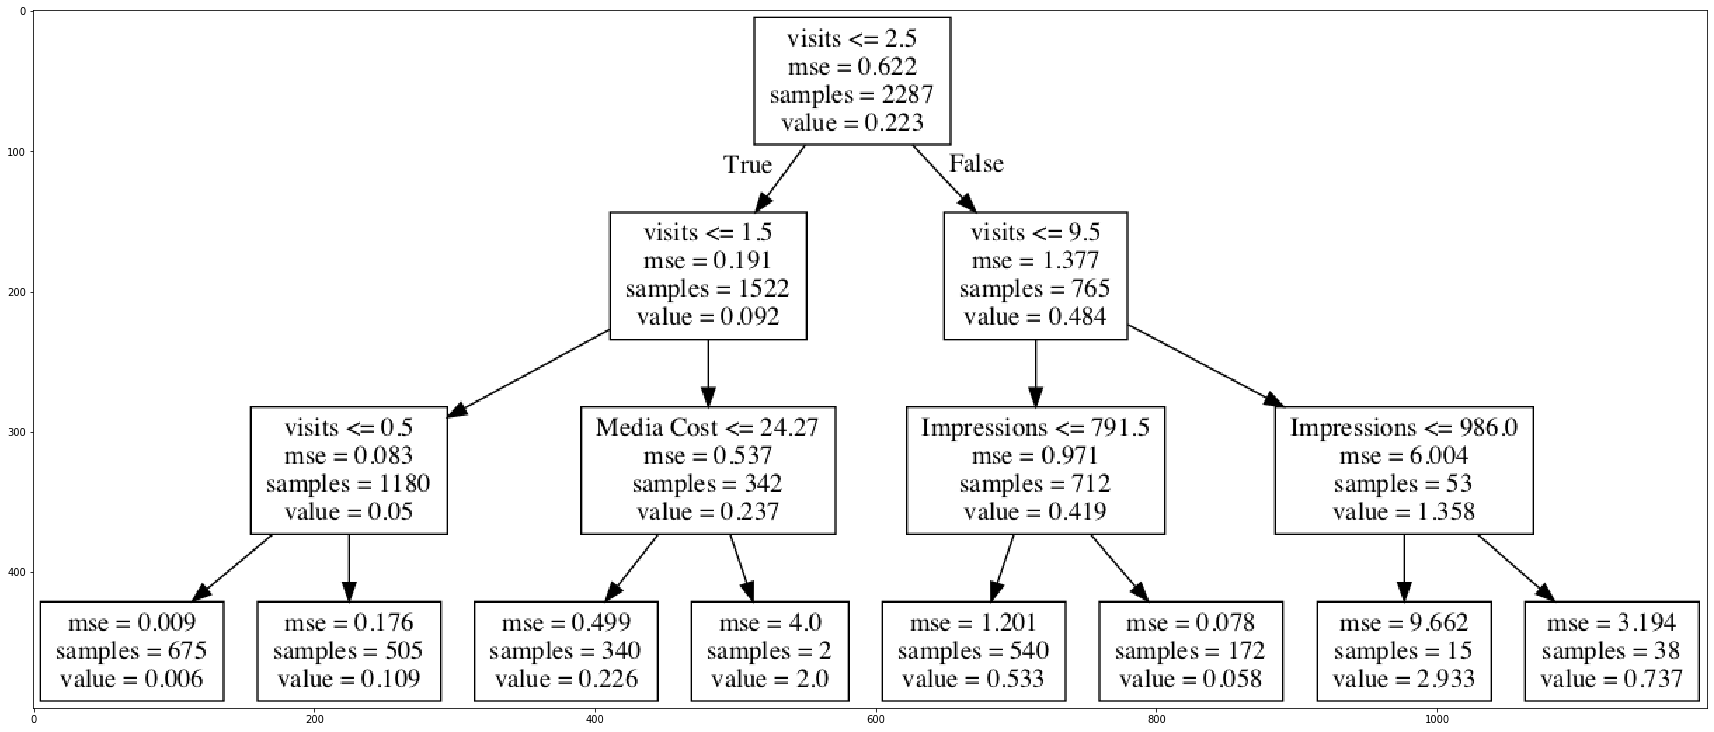

In [48]:
 bday_tree = plt.imread(png_path)
fig, ax = plt.subplots(figsize=(30, 30))
ax.imshow(bday_tree);

In [42]:
target_col='Media Cost'
y2 = bday.loc[:,target_col]

feature_cols =  'visits', 'Impressions', 'Total Leads','Web Leads'
X2 = bday.loc[:,feature_cols]

from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, shuffle = False)

from sklearn.linear_model import LinearRegression 
lr= LinearRegression()

lr.fit(X2_train, y2_train)
print(lr.score(X2_test, y2_test))
print(lr.score(X2_train, y2_train))

0.6058825514596231
0.8892912645493963


In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, KFold

dtr = DecisionTreeRegressor()
kf = KFold(n_splits=10, shuffle=True)

grid = GridSearchCV(estimator=dtr,
                    param_grid={},
                    return_train_score=True,
                    cv=kf,
                    )
grid.fit(X2, y2)
print(grid.cv_results_['mean_train_score'][0])
print(grid.cv_results_['mean_test_score'][0])

0.9936732212253705
0.693448732846892
